In [16]:
#Learn from scratch
#import libraries for scripts
import pandas as pd #used for data
import numpy as np #used for math calculations
import matplotlib.pyplot as plt # used for visualizations
import seaborn as sns #for enhanced visuals

In [6]:
#generate a random dataset
np.random.seed(42) #for reproducibility
n = 300 #number of customers
data = pd.DataFrame({
    'CustomerID': np.arange(1,n+1),
    'Count of Orders': np.random.poisson(5, n), #randomly generated order counts
    'Average Order Value': np.random.normal(loc=600, scale=100, size=n), #randomly generated average order values
    'Last order diff': np.random.randint(1,180,n) #randomly generated last order dates
})
print("Dataset created with {} customers.".format(n))

Dataset created with 300 customers.


In [11]:
#cretae a column called 'Churn' based on the last order date
data['Churn'] = ((data['Last order diff'] > 90) & (data['Count of Orders'] < 3)).astype(int) #1 if churned, 0 if not
#display the first 5 rows of the dataset
print(data.head())
data.describe() #display the summary statistics of the dataset

   CustomerID  Count of Orders  Average Order Value  Last order diff  Churn
0           1                5           480.870986               21      0
1           2                4           606.268540              156      0
2           3                4           608.864670              161      0
3           4                5           772.212861              163      0
4           5                5           577.101714               34      0


,CustomerID,Count of Orders,Average Order Value,Last order diff,Churn
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,4.963333,603.150141,92.983333,0.076667
std,86.746758,2.225270,95.410688,53.405839,0.266506
min,1.000000,1.000000,312.871734,1.000000,0.000000
25%,75.750000,3.000000,539.139625,46.750000,0.000000
50%,150.500000,5.000000,606.822775,90.500000,0.000000
75%,225.250000,6.000000,664.535580,142.000000,0.000000
max,300.000000,11.000000,866.318235,179.000000,1.000000


In [13]:
#churn rate
churn_rate = data['Churn'].mean() * 100
print("Churn Rate: {:.2f}%".format(churn_rate))

Churn Rate: 7.67%


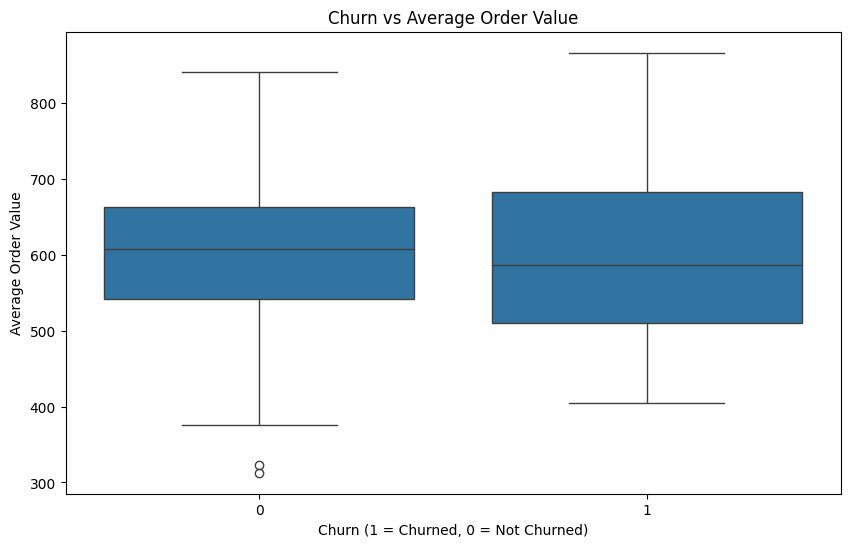

In [17]:
#visualize the churn rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Average Order Value', data=data)
plt.title('Churn vs Average Order Value')
plt.xlabel('Churn (1 = Churned, 0 = Not Churned)')
plt.ylabel('Average Order Value')
plt.show()